In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ['E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00017-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00018-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00019-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00021-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00022-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00023-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00024-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00025-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00027-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00028-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00031-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined1_df = dataframes[0]
for df in dataframes[1:]:
    combined1_df = combined1_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined1_file.csv'
combined1_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [4]:
df = pd.read_csv(r"C:\Users\nvnS\combined1_file.csv\part-00000-4d81ca67-f91c-47d6-bfca-9a953791bbb6-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,581.33,54.00,66.3,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.0,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.01,0.04,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,644.60,57.88,131.6,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457487,0.000000,54.00,6.00,64.00,6.171316,6.171316,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334828e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
457488,0.000000,174.00,6.00,64.00,5.748701,5.748701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1827.00,174.00,174.0,174.000000,0.000000,174.00,8.306403e+07,9.5,18.654758,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
457489,0.000000,0.00,1.00,64.00,6.408142,6.408142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312907e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
457490,0.000000,182.00,17.00,64.00,38.417293,38.417293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1911.00,182.00,182.0,182.000000,0.000000,182.00,8.300729e+07,9.5,19.078784,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood


In [5]:
df['label'].value_counts()

DDoS-ICMP_Flood            70083
DDoS-UDP_Flood             52969
DDoS-TCP_Flood             44113
DDoS-PSHACK_Flood          40583
DDoS-SYN_Flood             39974
DDoS-RSTFINFlood           39701
DDoS-SynonymousIP_Flood    34987
DoS-UDP_Flood              32457
DoS-TCP_Flood              25956
DoS-SYN_Flood              19589
BenignTraffic              10800
Mirai-greeth_flood          9744
Mirai-udpplain              8969
Mirai-greip_flood           7364
DDoS-ICMP_Fragmentation     4509
MITM-ArpSpoofing            3046
DDoS-ACK_Fragmentation      2889
DDoS-UDP_Fragmentation      2876
DNS_Spoofing                1752
Recon-HostDiscovery         1349
Recon-OSScan                 942
Recon-PortScan               829
DoS-HTTP_Flood               761
VulnerabilityScan            353
DDoS-HTTP_Flood              296
DDoS-SlowLoris               206
DictionaryBruteForce         120
BrowserHijacking              60
SqlInjection                  58
CommandInjection              54
Backdoor_M

In [6]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

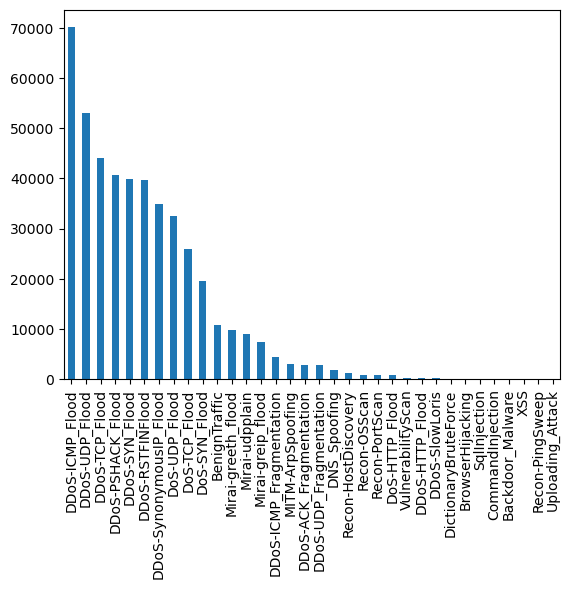

In [7]:
bar_graph('label')

In [8]:
#change Multi-class to binary-class
df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


In [9]:
df['label'].unique()

array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [10]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,581.33,54.00,66.3,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,20
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.0,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,21
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.01,0.04,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,644.60,57.88,131.6,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457487,0.000000,54.00,6.00,64.00,6.171316,6.171316,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.0,54.000000,0.000000,54.00,8.334828e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
457488,0.000000,174.00,6.00,64.00,5.748701,5.748701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1827.00,174.00,174.0,174.000000,0.000000,174.00,8.306403e+07,9.5,18.654758,0.000000,0.000000,0.00,141.55,13
457489,0.000000,0.00,1.00,64.00,6.408142,6.408142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.0,42.000000,0.000000,42.00,8.312907e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
457490,0.000000,182.00,17.00,64.00,38.417293,38.417293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1911.00,182.00,182.0,182.000000,0.000000,182.00,8.300729e+07,9.5,19.078784,0.000000,0.000000,0.00,141.55,21


In [11]:
x=df.drop(columns=['label'])
y=df['label']

In [12]:
y

0          9
1         20
2          6
3         21
4         19
          ..
457487     9
457488    13
457489     6
457490    21
457491    12
Name: label, Length: 457492, dtype: int32

In [13]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 365993
Testing set: 91499


In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

accuracy: 0.8021289850162296
precision: 0.8094044094953794
recall:  0.8021289850162296
f1:  0.7672860872547607


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9922403523535777
precision: 0.9917770263608698
recall:  0.9922403523535777
f1:  0.9915837464556606


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.7915824216658106
precision: 0.7335513808595037
recall:  0.7915824216658106
f1:  0.7359118317492787


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

# neural network

In [19]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [20]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(365993, 46)
(365993, 34)
(91499, 46)
(91499, 34)


In [22]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [23]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [25]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
4550/4575 [============================>.] - ETA: 0s - loss: 0.0736 - accuracy: 0.9769
Epoch 1: val_accuracy improved from -inf to 0.97728, saving model to nn.hdf5
4575/4575 [==============================] - 8s 2ms/step - loss: 0.0735 - accuracy: 0.9769 - val_loss: 0.0670 - val_accuracy: 0.9773
Epoch 2/20
4550/4575 [============================>.] - ETA: 0s - loss: 0.0728 - accuracy: 0.9774
Epoch 2: val_accuracy did not improve from 0.97728
4575/4575 [==============================] - 8s 2ms/step - loss: 0.0728 - accuracy: 0.9774 - val_loss: 0.0703 - val_accuracy: 0.9773
Epoch 3/20
4552/4575 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9771
Epoch 3: val_accuracy improved from 0.97728 to 0.98176, saving model to nn.hdf5
4575/4575 [==============================] - 8s 2ms/step - loss: 0.0715 - accuracy: 0.9771 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 4/20
4565/4575 [============================>.] - ETA: 0s - loss: 0.0649 - accuracy: 0.9795
E

Text(0, 0.5, 'accuracy')

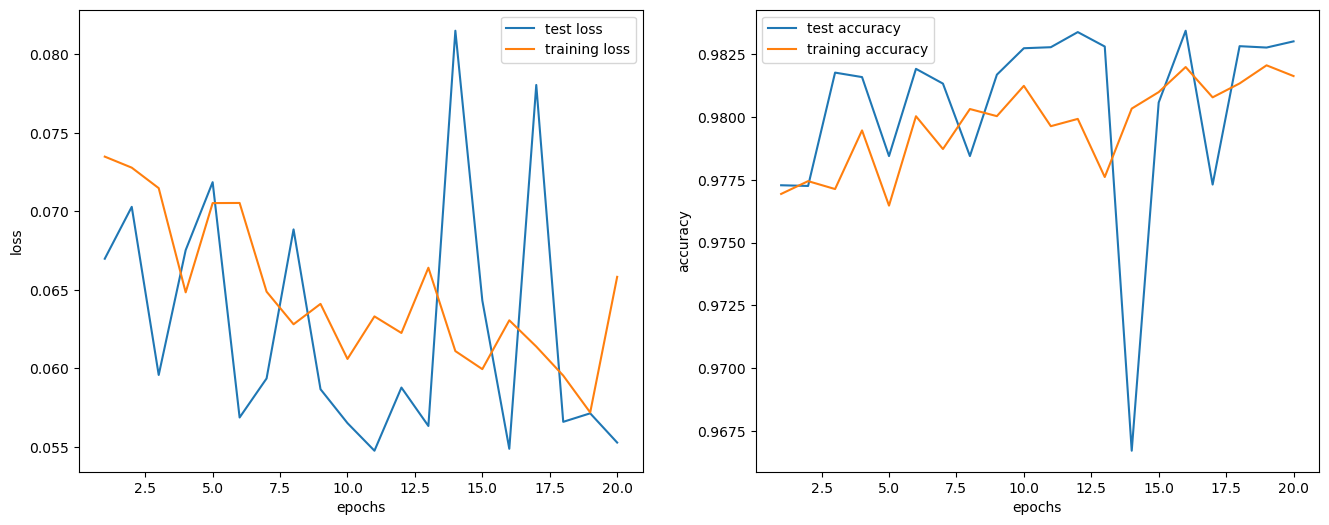

In [27]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [28]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

2860/2860 [==============================] - 2s 708us/step
Precision score:  0.980367461110809
Recall score:  0.9824260374430321
F1 score:  0.9801118943724255


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
